In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import pandas as pd

/home/pedro2/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/pedro2/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/pedro2/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
torch.cuda.set_device(1)

In [5]:
PATH = 'words/'
csv_path = PATH + 'csv_files/g06.csv'
n = len(list(open(csv_path))) - 1 # -1 to ignore the header line
n

11626

In [6]:

arch = resnet50
sz = 64
bs = 64
val_idxs = get_cv_idxs(n)
tfms = tfms_from_model(arch, sz)

data = ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, bs = bs, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [7]:
# comparing instances of dataset object and original data

# picking first image (index 0)
x1 = data.trn_ds.get_x(0)

# picking file name of first image
path = data.trn_ds.fnames[0]
x2 = plt.imread(PATH + path)
# image in grayscale, repeat it 3 times to get RGB values
x2 = np.stack((x2, x2, x2), axis = 2)



(-0.5, 133.5, 63.5, -0.5)

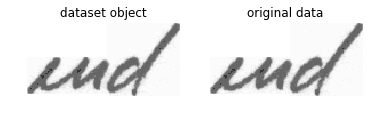

In [8]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x1)
ax[0].axis('off')
ax[0].set(title = 'dataset object')
ax[1].imshow(x2)
ax[1].set(title = 'original data')
ax[1].axis('off')

In [9]:
fn = [PATH + data.trn_ds.fnames[0]]; fn

['words/png_files/g06-011a-00-02.png']

In [10]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz)
    return ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [11]:
learn = ConvLearner.pretrained(arch, data)

 90%|████████▉ | 131/146 [00:54<00:06,  2.43it/s, loss=13]  

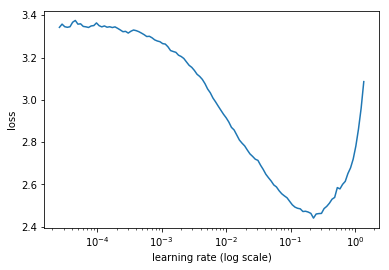

In [12]:
lrf=learn.lr_find()
learn.sched.plot()

In [13]:
lr = 0.02
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.645977   1.267178   0.605591  
    1      1.352963   1.063379   0.656774                   
    2      1.171399   0.963198   0.699785                   
    3      1.190398   0.971544   0.692903                   
    4      1.1069     0.891883   0.712258                   
    5      1.046368   0.830949   0.733333                   
    6      0.974786   0.825344   0.729892                    


[array([0.82534]), 0.7298924733746436]

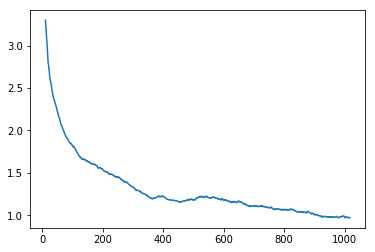

In [14]:
learn.sched.plot_loss()

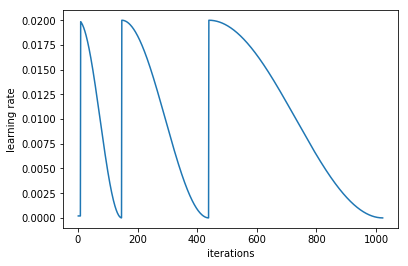

In [15]:
learn.sched.plot_lr()

In [16]:
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.813674   0.523692   0.824516  
    1      0.596372   0.389641   0.867527                    
    2      0.429039   0.305139   0.898065                    
    3      0.482823   0.331681   0.892043                    
    4      0.35117    0.278996   0.904086                    
    5      0.285433   0.232997   0.924301                    
    6      0.246616   0.22336    0.925161                    


[array([0.22336]), 0.9251612903738534]

In [17]:
learn.save(f'{sz}')

In [18]:
tmfs = tfms_from_model(arch, sz, aug_tfms = transforms_side_on, max_zoom = 1.1)

In [19]:
data = ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [20]:
learn_data_agumentation = ConvLearner.pretrained(arch, data)

 90%|████████▉ | 131/146 [00:44<00:05,  2.97it/s, loss=17.3]

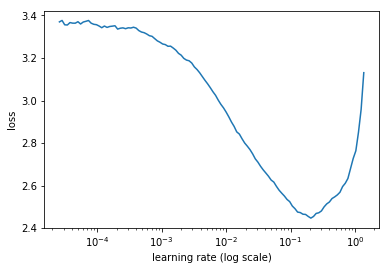

In [21]:
lrf=learn_data_agumentation.lr_find()
learn_data_agumentation.sched.plot()

In [22]:
lr = 0.02
learn_data_agumentation.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.605855   1.253921   0.610323  
    1      1.359421   1.022103   0.68129                    
    2      1.161772   0.957443   0.698925                   
    3      1.194801   0.974357   0.691183                   
    4      1.094996   0.891416   0.713118                   
    5      1.009509   0.833158   0.732043                   
    6      0.951263   0.824021   0.731183                    


[array([0.82402]), 0.7311827959296524]

In [23]:
lrs = np.array([lr/9,lr/3,lr])
learn_data_agumentation.unfreeze()
learn_data_agumentation.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.837724   0.506556   0.836559  
    1      0.640678   0.412035   0.866237                    
    2      0.397976   0.306957   0.901075                    
    3      0.465993   0.408573   0.870968                    
    4      0.356103   0.272652   0.914409                    
    5      0.284637   0.22891    0.926022                    
    6      0.231969   0.217567   0.932473                    


[array([0.21757]), 0.9324731183308427]

In [24]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [25]:
accuracy_np(preds, y)

0.9436559139784946

In [26]:
multi_preds, y = learn_data_agumentation.TTA()
preds = np.mean(multi_preds, 0)

In [27]:
accuracy_np(preds,y)

0.9449462365591398